<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/Load_FashionMNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Fashing MNIST dataset using PyTorch

https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler #For validation

transforms.Compose creates a series of transformation to prepare the dataset.

transforms.ToTenser convert PIL image(L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].

transform.Normalize Normalize a tensor image with mean and standard deviation. Tensor image size should be (C x H x W) to be normalized which we already did usetransforms.ToTenser.

datasets.FashionMNIST to download the Fashion MNIST datasets and transform the data. train=True if we want to get trained dataset otherwise set the parameter False for the test dataset.

torch.utils.data.Dataloader takes our data train or test data with parameter batch_size and shuffle. batch_size define the how many samples per batch to load, and shuffle parameter set the True to have the data reshuffled at every epoch.


In [2]:
# transform: to convert images to tensor and normalize.  Mean and std are sequences, therefore adding a comma after the values.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,),)])

# Load the data tarin and test sets
trainset = datasets.FashionMNIST('~/data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/data', download=True, train=False, transform=transform)

# Prepare for validation test
indices = list(range(len(trainset)))
np.random.shuffle(indices)

split = int(np.floor(0.2 * len(trainset)))
train_sample = SubsetRandomSampler(indices[:split])
valid_sample = SubsetRandomSampler(indices[split:])

# Data Loader
trainloader = DataLoader(trainset, sampler=train_sample, batch_size=64)
validloader = DataLoader(trainset, sampler=valid_sample, batch_size=64)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/FashionMNIST/raw



In [3]:
print(trainset)
print(trainloader)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


Display some sample images from Fashion MNIST training dataset

Text(0.5, 0.98, 'Few images of Fashion MNIST testing dataset')

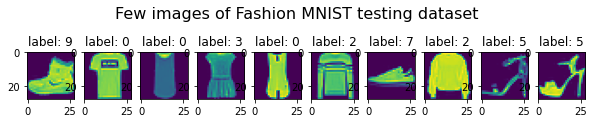

In [7]:
import matplotlib.pyplot as plt

nb_digits_to_display = 10

plt.figure(figsize=(10,2)) 
plt.title("Few images of Fashion MNIST dataset")
for i in range(nb_digits_to_display):
    plt.subplot(1,nb_digits_to_display, i+1)
    plt.imshow(trainset.data[i].numpy())
    plt.title(f"label: {trainset.targets[i].numpy()}")

plt.suptitle("Few images of Fashion MNIST testing dataset", fontsize=16)